# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
import matplotlib.pyplot as plt

### geo params

In [4]:
geo_params = pd.read_csv('../geo_params.csv')

In [5]:
geo_params.head()

,geoCluster,cityId
0,21,1
1,47,1
2,48,1
3,92,1
4,112,1


In [6]:
geo_params['geoCluster'].nunique()

515

In [7]:
geo_params['cityId'].nunique()

3

In [8]:
geo_params['cityId'].value_counts()

0     450
1      64
25      1
Name: cityId, dtype: int64

In [9]:
geo_params[geo_params['cityId']==25]['geoCluster']

53    681
Name: geoCluster, dtype: int64

In [10]:
geo_params.groupby('cityId')['geoCluster'].size()

cityId
0     450
1      64
25      1
Name: geoCluster, dtype: int64

### test data 

In [11]:
test_data = pd.read_csv('../test_data.csv')

In [12]:
test_data.head(1)

,ID,geoCluster,SKU,date,price
0,RR1666030,21,32485,2021-07-20,66.69


In [13]:
test_data.shape

(1666028, 5)

In [14]:
test_data['price'].isna().sum()

0

In [15]:
test_data['SKU'].nunique()

1961

In [16]:
test_data.geoCluster.nunique()

515

In [17]:
681 in test_data['geoCluster'].unique()

True

In [18]:
test_data['price'].min()

0.19

### sku final

In [167]:
sku_meta = pd.read_csv('../sku_final.csv')

In [168]:
sku_meta.head()

,SKU,productCategoryId,productCategory_caption_UKR,productCategory_caption_RU,productCategory_caption_ENG,productTypeId,productType_caption_UKR,productType_caption_RU,productType_caption_ENG,brandId,lagerUnitQuantity,lagerUnitTypeId,lagerUnitType_caption,trademark,countryOfOrigin,countryOfOrigin_caption,commodity_group,commodity_group_caption_UKR,commodity_group_caption_RU,commodity_group_caption_ENG
0,17,5416.0,Хурма,Хурма,Persimmon,4770.0,Тропічні фрукти - Хурма - Звичайна,Тропические фрукты - Хурма - Обычная,Tropical fruit — Persimmon — Plain,NaN,1.0,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits
1,18,5413.0,Фейхоа,Фейхоа,Feijoa,4772.0,Тропічні фрукти - Екзотичні,Тропические фрукты - Экзотические,Tropical fruit — Exotic,NaN,1.0,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits
2,24,5425.0,Гранат,Гранат,Pomegranate,4760.0,Тропічні фрукти - Гранат - Звичайний,Тропические фрукты - Гранат - Обычный,Tropical fruit — Pomegranate— Plain,NaN,1.0,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits
3,25,5431.0,Апельсин,Апельсин,Orange,4773.0,Цитрусові фрукти - Апельсин - Звичайний,Цитрусовые фрукты - Апельсин - Обычный,Citrus fruit — Orange — Plain,NaN,1.0,2,кг,NaN,8.0,Іспанія,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits
4,208,5835.0,Вода України газована,Вода Украины газированная,"Water, Ukraine, sparkling",3457.0,Лікувально-столова вода - Україна - ПЕТ - від ...,Лечебно-столовая вода - Украина - ПЭТ - от 1л ...,Therapeutic-table water — Ukraine — PET — from...,1241.0,1.5,3,л,3670.0,1.0,Україна,5550022,Вода Мфнеральна,Вода Минеральная,Mineral water


In [21]:
sku_meta['SKU'].nunique()

1961

In [22]:
sku_meta['productCategory_caption_UKR'].value_counts()

Йогурти                                                       210
Десерти молочні                                               132
Сири напівтверді насипні                                       90
Сири напівтверді пластової                                     89
Вода України газована                                          69
                                                             ... 
Здоба дрібноштучних з сухофруктами власного виробництва         1
Батон з добавками власного виробництва                          1
Здоба дрібноштучних з яєчної начинкою власного виробництва      1
Круасан з м'ясною начинкою власного виробництва                 1
Слойка з ягідної начинкою допік                                 1
Name: productCategory_caption_UKR, Length: 186, dtype: int64

In [23]:
sku_meta['commodity_group_caption_UKR'].value_counts()

Випічка                        730
Йогуртно-десертна продукція    474
Сири на вагу                   349
Вода Мфнеральна                265
Фрукти тропічні                143
Name: commodity_group_caption_UKR, dtype: int64

In [24]:
sku_meta['brandId'].isna().sum()

845

In [25]:
sku_meta['lagerUnitType_caption'].unique()

array(['г         ', 'кг        ', 'л         ', 'шт        ',
       'мл        '], dtype=object)

In [26]:
sku_meta['lagerUnitType_caption'] = sku_meta['lagerUnitType_caption'].str.strip()

In [27]:
sku_meta['productTypeId'].isna().sum()

217

In [28]:
sku_meta['countryOfOrigin_caption'].value_counts()

Україна           474
Нідерланди         60
Італія             56
Франція            52
Німеччина          14
Грузія              8
Польща              8
Іспанія             7
Швейцарія           4
Хорватія            4
Латвія              3
Великобританія      3
Данія               2
Греція              2
Азербайджан         2
Туреччина           2
Австрія             2
Болгарія            1
Вірменія            1
Фіджі               1
Бельгія             1
Росія               1
Таїланд             1
Китай               1
Name: countryOfOrigin_caption, dtype: int64

In [29]:
sku_meta['commodity_group'].isna().sum()

0

In [30]:
sku_meta.isna().sum()

SKU                               0
productCategoryId                 0
productCategory_caption_UKR     154
productCategory_caption_RU        0
productCategory_caption_ENG     154
productTypeId                   217
productType_caption_UKR         398
productType_caption_RU          217
productType_caption_ENG         398
brandId                         845
lagerUnitQuantity                 0
lagerUnitTypeId                   0
lagerUnitType_caption             0
trademark                        88
countryOfOrigin                1251
countryOfOrigin_caption        1251
commodity_group                   0
commodity_group_caption_UKR       0
commodity_group_caption_RU        0
commodity_group_caption_ENG       0
dtype: int64

In [31]:
description = np.hstack(sku_meta['productCategory_caption_RU'].apply(lambda x: x.split(' ')))

In [32]:
unique_tokens_desc, frequency_desc = np.unique(description, return_counts=True)

In [33]:
sorted(list(zip(unique_tokens_desc, frequency_desc)),key=lambda x: x[1])[::-1]

[('с', 516),
 ('собств', 360),
 ('производства', 351),
 ('Сыры', 348),
 ('начинкой', 301),
 ('Вода', 265),
 ('произв', 218),
 ('собственного', 215),
 ('Йогурты', 210),
 ('полутвердые', 206),
 ('без', 162),
 ('Украины', 162),
 ('молочные', 144),
 ('Сдоба', 133),
 ('допек', 132),
 ('Хлеб', 132),
 ('Десерты', 132),
 ('добавками', 127),
 ('газированная', 124),
 ('добавок', 109),
 ('импортная', 103),
 ('негазированная', 101),
 ('мясной', 96),
 ('подовый', 90),
 ('насыпные', 90),
 ('пластовой', 89),
 ('мелкошт', 79),
 ('Творог', 79),
 ('пшеничный', 77),
 ('Слойка', 66),
 ('Пицца', 65),
 ('мягкие', 62),
 ('мелкоштучная', 59),
 ('твердые', 57),
 ('плесень', 49),
 ('ягодной', 46),
 ('Булка', 44),
 ('Багет', 43),
 ('начинки', 42),
 ('фруктовой', 40),
 ('слабогазированная', 40),
 ('ржано-пшеничный', 35),
 ('овощной', 32),
 ('видовые', 32),
 ('глазурованный', 30),
 ('Сырок', 30),
 ('Чиабатта', 25),
 ('маковой', 24),
 ('светлая', 23),
 ('руч', 23),
 ('работы', 23),
 ('пекарня', 23),
 ('крупнопорист

In [34]:
sku_meta = sku_meta[['SKU','lagerUnitType_caption','commodity_group','productCategory_caption_RU']]

### train data

In [35]:
train_data = pd.read_csv('../train_final.csv')

In [36]:
train_data.shape

(27956445, 6)

In [37]:
def change_type(df, col, type_):
    df[col] = df[col].astype(type_)
    return df

In [38]:
train_data.describe()

,geoCluster,SKU,price,sales
count,2.795644e+07,2.795644e+07,1.981387e+06,1.981387e+06
mean,2.229731e+03,5.473637e+05,8.558095e+01,3.011340e+00
std,2.593208e+02,2.664443e+05,1.406909e+02,3.583562e+00
min,2.100000e+01,1.700000e+01,0.000000e+00,1.000000e-03
25%,2.047000e+03,4.098970e+05,2.139000e+01,1.000000e+00
50%,2.158000e+03,6.128430e+05,3.699000e+01,2.000000e+00
75%,2.279000e+03,7.750170e+05,6.829000e+01,4.000000e+00
max,3.230000e+03,8.738030e+05,7.246890e+03,8.010000e+02


In [39]:
train_data = change_type(train_data, 'geoCluster', 'uint16')
train_data = change_type(train_data, 'SKU', 'uint32')

In [40]:
train_data.head()

,ID,geoCluster,SKU,date,price,sales
0,RR27956447,21,32485,2021-07-08,39.69,0.9
1,RR27956448,21,32485,2021-07-09,NaN,NaN
2,RR27956449,21,32485,2021-07-10,NaN,NaN
3,RR27956450,21,32485,2021-07-11,NaN,NaN
4,RR27956451,21,32485,2021-07-12,NaN,NaN


In [41]:
train_data['price'].isna().sum()==train_data['sales'].isna().sum()

True

In [42]:
train_data['date'].min(), train_data['date'].max()

('2020-01-01', '2021-07-19')

In [43]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [44]:
train_data['month'] = train_data['date'].dt.month

In [45]:
train_data['day'] = train_data['date'].dt.day

In [46]:
train_data['weekday'] = train_data['date'].dt.weekday

In [47]:
train_data['week_num'] = train_data['date'].dt.week

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [48]:
train_data.head(2)

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num
0,RR27956447,21,32485,2021-07-08,39.69,0.9,7,8,3,27
1,RR27956448,21,32485,2021-07-09,NaN,NaN,7,9,4,27


In [49]:
train_data.shape

(27956445, 10)

In [50]:
train_data = train_data.merge(sku_meta, on='SKU', how ='inner')

In [51]:
train_data.shape

(27956445, 13)

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 13 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   price                       float64       
 5   sales                       float64       
 6   month                       int64         
 7   day                         int64         
 8   weekday                     int64         
 9   week_num                    int64         
 10  lagerUnitType_caption       object        
 11  commodity_group             int64         
 12  productCategory_caption_RU  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), uint16(1), uint32(1)
memory usage: 2.7+ GB


In [53]:
train_data = train_data.merge(geo_params, on='geoCluster', how='inner')

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 14 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   price                       float64       
 5   sales                       float64       
 6   month                       int64         
 7   day                         int64         
 8   weekday                     int64         
 9   week_num                    int64         
 10  lagerUnitType_caption       object        
 11  commodity_group             int64         
 12  productCategory_caption_RU  object        
 13  cityId                      int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3), uint16(1), uint32(1)
memory usage: 2.9+ GB


In [55]:
train_data = change_type(train_data, 'weekday', 'uint8')
train_data = change_type(train_data, 'day', 'uint8')
train_data = change_type(train_data, 'month', 'uint8')
train_data = change_type(train_data, 'cityId', 'uint8')
train_data = change_type(train_data, 'commodity_group', 'uint8')

In [56]:
train_data = change_type(train_data, 'week_num', 'uint8')

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 14 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   price                       float64       
 5   sales                       float64       
 6   month                       uint8         
 7   day                         uint8         
 8   weekday                     uint8         
 9   week_num                    uint8         
 10  lagerUnitType_caption       object        
 11  commodity_group             uint8         
 12  productCategory_caption_RU  object        
 13  cityId                      uint8         
dtypes: datetime64[ns](1), float64(2), object(3), uint16(1), uint32(1), uint8(6)
memory usage: 1.8+ GB


In [58]:
unique_products = train_data['SKU'].unique()

In [59]:
import gc

In [60]:
del geo_params, sku_meta;
gc.collect();

### Products in train data - a subset of products in test one (thus we better not use SKU id as feature)

In [61]:
len(unique_products)

1925

In [62]:
len(set(unique_products).intersection(test_data['SKU'].unique()))==test_data['SKU'].nunique()

False

In [63]:
test_data['SKU'].nunique()

1961

In [64]:
len(set(unique_products).intersection(test_data['SKU'].unique()))==len(unique_products)

True

### Same with geo cluster

In [65]:
unique_geo_cluster = train_data['geoCluster'].unique()

In [66]:
len(unique_geo_cluster)

512

In [67]:
test_data['geoCluster'].nunique()

515

In [68]:
train_data.shape

(27956445, 14)

### most of rows are nans, meaning that the some products were not sold 

In [69]:
train_data['price'].isna().sum()/train_data.shape[0]

0.9291259314265459

In [70]:
train_data.sales.max()

801.0

<AxesSubplot:xlabel='sales', ylabel='Count'>

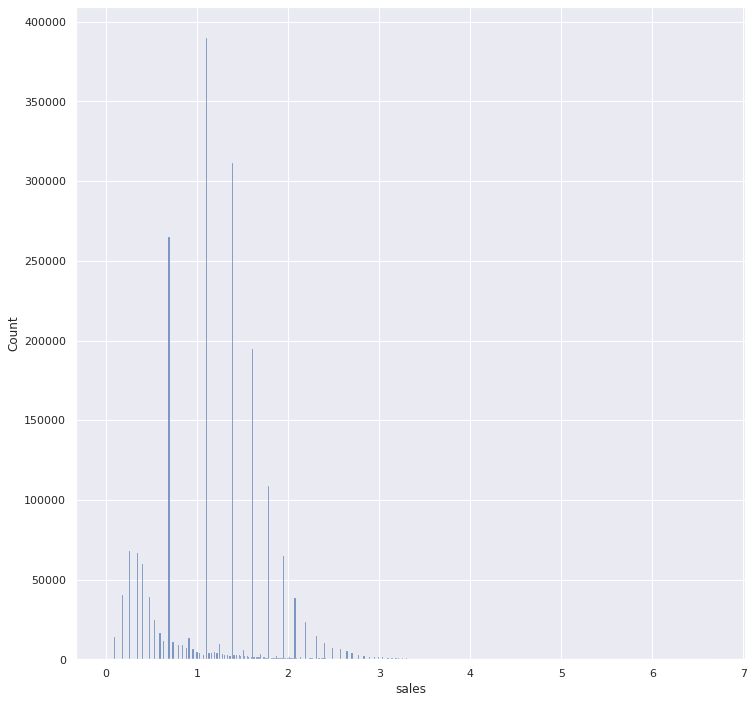

In [71]:
plt.figure(figsize=(12,12))
sns.histplot(np.log1p(train_data.sales))

In [72]:
train_data['lagerUnitType_caption'].value_counts()

г     17766168
кг     5650497
л      3371374
шт     1164050
мл        4356
Name: lagerUnitType_caption, dtype: int64

(array([ 13.,  17.,  99., 231., 234., 262., 233., 244., 337., 255.]),
 array([ 0.        ,  1.18017594,  2.36035187,  3.54052781,  4.72070375,
         5.90087969,  7.08105562,  8.26123156,  9.4414075 , 10.62158344,
        11.80175937]),
 <BarContainer object of 10 artists>)

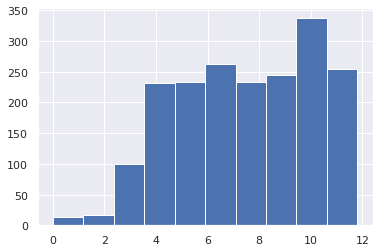

In [73]:
plt.hist(np.log(train_data['SKU'].value_counts()))

### price is different for the same product and is affected by the date and geoCluster

In [74]:
train_data[train_data['lagerUnitType_caption']=='шт'].dropna(how='any')

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
4475,RR27956766,148,32490,2021-05-17,41.09,2.0,5,17,0,20,шт,170,Авокадо,1
4725,RR27957175,148,34604,2021-04-25,141.99,3.0,4,25,6,16,шт,170,Ананас,1
10142,RR27957763,310,32490,2021-04-20,36.89,3.0,4,20,1,16,шт,170,Авокадо,1
10506,RR27958124,310,49207,2021-04-26,42.59,1.0,4,26,0,17,шт,170,Манго,1
13946,RR27959397,491,32507,2021-04-18,68.09,2.0,4,18,6,15,шт,170,Киви,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27907129,RR31319322,3230,838137,2021-07-18,52.59,4.0,7,18,6,28,шт,170,Авокадо,0
27917082,RR27967393,1677,32490,2021-06-22,24.09,1.0,6,22,1,25,шт,170,Авокадо,0
27917116,RR27972756,1879,32490,2021-05-25,28.39,1.0,5,25,1,21,шт,170,Авокадо,0
27917588,RR30683481,2422,32490,2021-06-29,39.69,2.0,6,29,1,26,шт,170,Авокадо,0


In [75]:
train_data[train_data['SKU']==32490].dropna(how='any').sort_values(by='date').head(10)

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
12310891,RR29415559,2126,32490,2020-04-05,28.49,1.0,4,5,6,14,шт,170,Авокадо,0
10526607,RR29197996,2091,32490,2020-04-05,28.49,2.0,4,5,6,14,шт,170,Авокадо,0
15695677,RR29829193,2201,32490,2020-04-05,28.49,1.0,4,5,6,14,шт,170,Авокадо,0
11147102,RR29282890,2113,32490,2020-04-06,28.49,7.0,4,6,0,15,шт,170,Авокадо,0
23318299,RR30726977,2508,32490,2020-04-06,29.09,4.0,4,6,0,15,шт,170,Авокадо,0
20744798,RR30400163,2276,32490,2020-04-06,28.49,2.0,4,6,0,15,шт,170,Авокадо,0
11328524,RR29302084,2115,32490,2020-04-06,28.49,3.0,4,6,0,15,шт,170,Авокадо,0
5768895,RR28631046,2040,32490,2020-04-07,28.49,3.0,4,7,1,15,шт,170,Авокадо,0
3665779,RR28382148,2022,32490,2020-04-07,28.49,4.0,4,7,1,15,шт,170,Авокадо,0
1119668,RR28092915,1995,32490,2020-04-07,28.49,5.0,4,7,1,15,шт,170,Авокадо,0


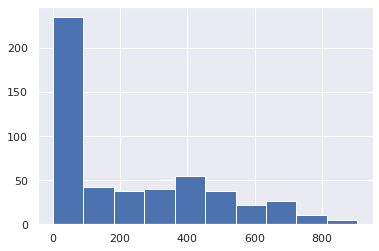

In [76]:
plt.hist(train_data.groupby('geoCluster')['SKU'].nunique());

In [77]:
train_data[train_data['lagerUnitType_caption']=='л'].dropna(how='any').sort_values(by='date').head(10)

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
27940725,RR43963070,2065,63037,2020-01-08,14.99,3.0,1,8,2,2,л,198,Вода Украины слабогазированная,0
27941284,RR43964553,2065,369991,2020-01-08,16.59,2.0,1,8,2,2,л,198,Вода Украины негазированная,0
27940730,RR43963075,2065,63037,2020-01-13,14.99,1.0,1,13,0,3,л,198,Вода Украины слабогазированная,0
27940732,RR43963077,2065,63037,2020-01-15,14.99,1.0,1,15,2,3,л,198,Вода Украины слабогазированная,0
27940733,RR43963078,2065,63037,2020-01-16,14.99,1.0,1,16,3,3,л,198,Вода Украины слабогазированная,0
27940737,RR43963082,2065,63037,2020-01-20,14.99,2.0,1,20,0,4,л,198,Вода Украины слабогазированная,0
27940738,RR43963083,2065,63037,2020-01-21,14.99,1.0,1,21,1,4,л,198,Вода Украины слабогазированная,0
27940740,RR43963085,2065,63037,2020-01-23,14.99,2.0,1,23,3,4,л,198,Вода Украины слабогазированная,0
27938796,RR43962530,2065,34635,2020-01-27,14.99,1.0,1,27,0,5,л,198,Вода Украины негазированная,0
27939336,RR43965112,2065,534443,2020-01-27,40.59,1.0,1,27,0,5,л,198,Вода импортная газированная,0


In [78]:
train_data[train_data['lagerUnitType_caption']=='л']['sales'].min()

1.0

In [79]:
train_data[train_data['lagerUnitType_caption']=='л']['sales'].max()

489.0

In [80]:
train_data[train_data['lagerUnitType_caption']=='кг'].dropna(how='any').sort_values(by='date').head(10)

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
2995759,RR28312211,2016,126831,2020-04-01,117.89,1.7,4,1,2,14,кг,170,Лимон,0
2995760,RR28312212,2016,126831,2020-04-02,117.89,0.5,4,2,3,14,кг,170,Лимон,0
23807804,RR49949551,2542,543663,2020-04-04,283.99,1.1,4,4,5,14,кг,16,Сыры мягкие белая плесень,0
15124798,RR48628818,2187,543663,2020-04-04,283.99,1.0,4,4,5,14,кг,16,Сыры мягкие белая плесень,0
4058242,RR46799969,2023,543663,2020-04-04,283.99,1.1,4,4,5,14,кг,16,Сыры мягкие белая плесень,0
9381135,RR52311643,2069,363713,2020-04-04,73.89,0.7,4,4,5,14,кг,76,Хлеб подовый ржано-пшен зерновой собств произв,0
9381136,RR52311644,2069,363713,2020-04-05,73.89,0.7,4,5,6,14,кг,76,Хлеб подовый ржано-пшен зерновой собств произв,0
11774544,RR48077969,2119,47330,2020-04-05,240.09,0.5,4,5,6,14,кг,16,Сыры полутвердые крупнопористые,0
13167566,RR48289548,2144,47330,2020-04-05,240.09,0.3,4,5,6,14,кг,16,Сыры полутвердые крупнопористые,0
10601644,RR47898180,2091,64165,2020-04-05,360.79,0.9,4,5,6,14,кг,16,Сыры полутвердые насыпные,0


In [81]:
train_data[train_data['lagerUnitType_caption']=='кг']['sales'].min()

0.001

In [82]:
train_data[train_data['lagerUnitType_caption']=='г'].dropna(how='any').sort_values(by='date').head(10)

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
27942907,RR52304931,2065,507343,2020-01-03,7.19,6.0,1,3,4,1,г,76,Булка мелкоштучная без добавок допек,0
27942912,RR52304936,2065,507343,2020-01-08,7.19,4.0,1,8,2,2,г,76,Булка мелкоштучная без добавок допек,0
27942913,RR52304937,2065,507343,2020-01-09,7.19,1.0,1,9,3,2,г,76,Булка мелкоштучная без добавок допек,0
27942917,RR52304941,2065,507343,2020-01-13,7.19,1.0,1,13,0,3,г,76,Булка мелкоштучная без добавок допек,0
27942353,RR52305495,2065,556482,2020-01-13,8.59,2.0,1,13,0,3,г,76,Булка мелкоштучная зерновая допек,0
27942354,RR52305496,2065,556482,2020-01-14,8.59,2.0,1,14,1,3,г,76,Булка мелкоштучная зерновая допек,0
27942926,RR52304950,2065,507343,2020-01-22,7.19,1.0,1,22,2,4,г,76,Булка мелкоштучная без добавок допек,0
27942931,RR52304955,2065,507343,2020-01-27,7.19,3.0,1,27,0,5,г,76,Булка мелкоштучная без добавок допек,0
27942367,RR52305509,2065,556482,2020-01-27,8.59,2.0,1,27,0,5,г,76,Булка мелкоштучная зерновая допек,0
27942939,RR52304963,2065,507343,2020-02-04,7.19,3.0,2,4,1,6,г,76,Булка мелкоштучная без добавок допек,0


In [83]:
train_data['sales'] = train_data['sales'].fillna(0)

<AxesSubplot:xlabel='date'>

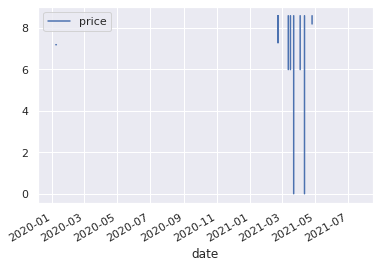

In [84]:
train_data[(train_data['SKU']==507343) & (~train_data['sales'].isna())][['geoCluster', 'date', 'day','price', 'sales']]\
.sort_values(by=['date','geoCluster']).plot(x = 'date', y = 'price')


<AxesSubplot:xlabel='date'>

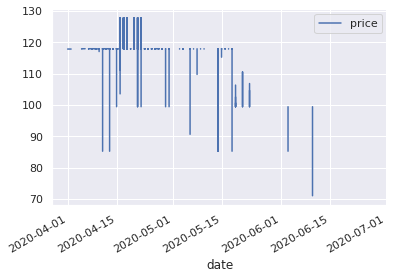

In [85]:
train_data[(train_data['SKU']==126831) & (~train_data['sales'].isna())][['geoCluster', 'date', 'day','price', 'sales']]\
.sort_values(by=['date','geoCluster']).plot(x = 'date', y = 'price')


In [86]:
train_data[train_data['lagerUnitType_caption']=='г']['sales'].min()

0.0

### working with price

In [87]:
train_data[(train_data['SKU']==507343) & (train_data['geoCluster']==2065)].sort_values(by='date')[['date','price']].interpolate()

,date,price
27942907,2020-01-03,7.19
27942908,2020-01-04,7.19
27942909,2020-01-05,7.19
27942910,2020-01-06,7.19
27942911,2020-01-07,7.19
...,...,...
27943466,2021-07-15,7.19
27943467,2021-07-16,7.19
27943468,2021-07-17,7.19
27943469,2021-07-18,7.19


<AxesSubplot:xlabel='date'>

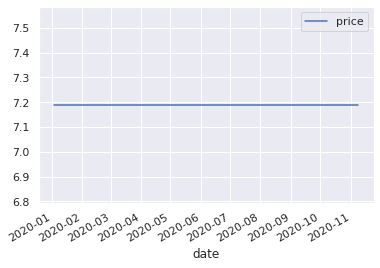

In [88]:
train_data[(train_data['SKU']==507343) & (train_data['geoCluster']==2065) & (~train_data['price'].isna())]\
.sort_values(by='date').plot(x='date',y='price')

<AxesSubplot:xlabel='date'>

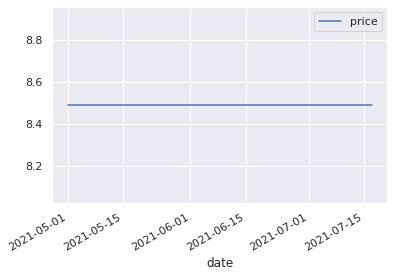

In [89]:
train_data[(train_data['SKU']==507343) & (train_data['geoCluster']==1867) & (~train_data['price'].isna())]\
.sort_values(by='date').plot(x='date',y='price')

In [90]:
price_date_spec_sku = train_data[(train_data['SKU']==507343)].groupby(['geoCluster','cityId']).agg({'price':list, 'date':list})

In [91]:
tmp = price_date_spec_sku['price'].apply(lambda x: set([i for i in x if not np.isnan(i)]))

In [92]:
tmp[tmp.apply(lambda x: len(x)>1)]

geoCluster  cityId
1934        0               {8.59, 5.99}
1995        0               {8.59, 5.99}
2013        0               {8.59, 5.99}
2017        0               {8.59, 5.99}
2028        0               {8.59, 5.99}
2033        0               {8.59, 8.19}
2049        0               {8.59, 7.89}
2053        0               {8.59, 6.89}
2149        0         {8.59, 8.09, 7.69}
2226        0               {8.59, 7.29}
2382        0          {8.59, 0.0, 5.99}
2735        0         {8.59, 5.99, 6.89}
2746        0               {8.59, 8.19}
2750        0               {8.59, 5.99}
3168        0               {8.59, 6.59}
Name: price, dtype: object

<AxesSubplot:xlabel='date'>

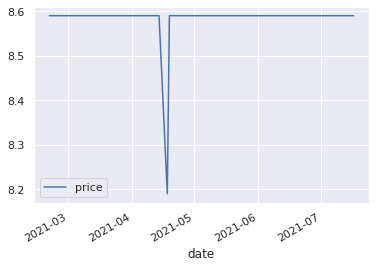

In [93]:
train_data[(train_data['SKU']==507343) & (train_data['geoCluster']==2033) & (~train_data['price'].isna())].plot('date','price')

In [94]:
train_data[(train_data['SKU']==507343) & (train_data['geoCluster']==2033) & (train_data['price']==8.19)]

,ID,geoCluster,SKU,date,price,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId
5197436,RR51556975,2033,507343,2021-04-18,8.19,5.0,4,18,6,15,г,76,Булка мелкоштучная без добавок допек,0


In [95]:
# price in one geoCluster is not dependant on price and discounts in other, thus simply interpolating
# also it could be that in the same cities the price for same product is the same

In [96]:
import tqdm

In [97]:
to_interpolate = train_data[['SKU','geoCluster','price','date']]
to_interpolate = to_interpolate.groupby(['geoCluster','SKU'])

In [98]:
interpolated = to_interpolate.apply(lambda x: x.sort_values(by='date').interpolate())

In [99]:
interpolated['price'].isna().sum()

51506

In [100]:
interpolated = interpolated[['price','date']].reset_index()

In [101]:
### logic to handle cases not handled by interpolation

In [102]:
interpolated[interpolated['price'].isna()][['SKU','geoCluster']].value_counts()

SKU     geoCluster
873803  3209          566
612305  2221          566
642700  3095          566
666063  2116          566
690818  2709          566
                     ... 
857555  2052          566
866585  2808          566
866586  2578          566
867714  2133          566
4211    2071          566
Length: 91, dtype: int64

In [103]:
interpolated[interpolated['SKU']==873803]['price'].unique()

array([nan])

In [104]:
interpolated[interpolated['price'].isna()]['SKU'].nunique()

55

In [105]:
len(interpolated)

27956445

In [106]:
interpolated[interpolated['price'].isna()]['SKU'].to_frame().drop_duplicates().to_csv('no_price.csv',index=False)

In [107]:
interpolated.head(1)

,geoCluster,SKU,level_2,price,date
0,21,32485,0,39.69,2021-07-08


In [108]:
len(train_data)

27956445

In [109]:
train_data['price'].isna().sum()

25975058

In [110]:
train_data = train_data.drop(columns='price').merge(interpolated, on=['date','SKU','geoCluster'])

In [111]:
train_data.drop(columns='level_2',inplace=True)

In [112]:
train_data[train_data['price'].isna()]['productCategory_caption_RU'].unique()

array(['Десерты молочные', 'Манго', 'Инжир', 'Йогурты',
       'Сыры полутвердые насыпные', 'Творог', 'Сыры твердые пармезановые',
       'Вода Украины негазированная', 'Вода Украины газированная',
       'Вода Украины слабогазированная', 'Авокадо',
       'Сдоба мелкошт с овощной начинкой собств произв',
       'Сырок глазурованный', 'Бисквиты молочные', 'Сыры твердые видовые',
       'Вода импортная газированная', 'Сыры мягкие белая плесень',
       'Багет без добавок допек',
       'Слойка с овощной начинкой собств производства',
       'Чиабатта светлая без добавок допек',
       'Сыры полутвердые крупнопористые', 'Мандарин',
       'Экзотические фрукты'], dtype=object)

In [113]:
train_data[train_data['price'].isna()]['cityId'].value_counts()

0    51506
Name: cityId, dtype: int64

In [114]:
train_data['price'].isna().sum()

51506

In [115]:
### no dependency between number of sales in geoCluster and date

In [116]:
with_nans_sku = train_data[train_data['price'].isna()]['SKU'].unique()

In [117]:
train_data[(train_data['SKU']==844052)].groupby('geoCluster').agg({'price':lambda x: len([i for i in x if not np.isnan(i)])}).sort_index()

,price
geoCluster,
1934,0.0
2021,32.0
2033,0.0
2043,47.0
2049,6.0
2077,44.0
2126,0.0
2170,0.0
2245,0.0


In [118]:
geoClusters_spec_prod = train_data[(train_data['SKU']==844052)].groupby('geoCluster')\
.agg({'price':lambda x: len([i for i in x if not np.isnan(i)])}).to_dict()

In [119]:
geoClusters_spec_prod = geoClusters_spec_prod['price']

In [120]:
geoClusters_spec_prod_sales = [k for k,v in geoClusters_spec_prod.items() if v>0]

In [121]:
train_data[train_data['geoCluster'].isin(geoClusters_spec_prod_sales)].date.min(), train_data[train_data['geoCluster'].isin(geoClusters_spec_prod_sales)].date.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-07-19 00:00:00'))

In [122]:
geoClusters_spec_no_prod_sales = [k for k,v in geoClusters_spec_prod.items() if v==0]

In [123]:
train_data[train_data['geoCluster'].isin(geoClusters_spec_no_prod_sales)].date.min(), train_data[train_data['geoCluster'].isin(geoClusters_spec_no_prod_sales)].date.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-07-19 00:00:00'))

In [124]:
train_data[(train_data['geoCluster'].isin(geoClusters_spec_prod_sales)) & (train_data['SKU']==844052)].date.min(),\
train_data[(train_data['geoCluster'].isin(geoClusters_spec_prod_sales)) & (train_data['SKU']==844052)].date.max()


(Timestamp('2021-06-03 00:00:00'), Timestamp('2021-07-19 00:00:00'))

In [125]:
train_data[(train_data['geoCluster'].isin(geoClusters_spec_no_prod_sales)) & (train_data['SKU']==844052)].date.min(),\
train_data[(train_data['geoCluster'].isin(geoClusters_spec_no_prod_sales)) & (train_data['SKU']==844052)].date.max()


(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-07-19 00:00:00'))

In [126]:
### filling with mean

In [130]:
list_price = train_data.groupby('SKU').agg({'price':list})

In [132]:
list_price['filter'] = list_price.price.apply(lambda x: all([np.isnan(i) for i in x ]))

In [133]:
list_price['filter'].sum()

5

In [134]:
list_price = list_price[list_price['filter']==True]

In [142]:
list_price.reset_index(inplace=True)

In [139]:
list_price[['SKU']].merge(train_data, how='left').to_csv('no_price.csv',index=False)

In [145]:
train_data[train_data['SKU'].isin(list_price['SKU'].unique())]['productCategory_caption_RU'].unique()

array(['Йогурты', 'Десерты молочные', 'Творог'], dtype=object)

In [148]:
train_data[train_data['SKU'].isin(list_price['SKU'].unique())]['commodity_group'].unique()

array([179], dtype=uint8)

In [159]:
for i in tqdm.tqdm(with_nans_sku):
    mean_price = train_data[train_data['SKU']==i]['price'].mean()
    if np.isnan(mean_price):
        categories = train_data[train_data['SKU']==i][['cityId','productCategory_caption_RU']].drop_duplicates().values
        cities, captions = categories[:,0], categories[:,1]
        mean_price = train_data[(train_data['cityId'].isin(cities)) & (train_data['productCategory_caption_RU'].isin(captions))]['price'].mean()
    train_data.loc[train_data['SKU']==i, 'price'] = mean_price

100%|██████████| 55/55 [00:18<00:00,  2.95it/s]


In [160]:
train_data.price.isna().sum()

0

### revanue feature and analysis

In [165]:
train_data['lagerUnitType_caption'].unique()

array(['г', 'л', 'шт', 'кг', 'мл'], dtype=object)

In [166]:
train_data[train_data['lagerUnitType_caption']=='г'].head(5)

,ID,geoCluster,SKU,date,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId,price,revanue
0,RR27956447,21,32485,2021-07-08,0.9,7,8,3,27,г,170,Банан,1,39.69,35.721
1,RR27956448,21,32485,2021-07-09,0.0,7,9,4,27,г,170,Банан,1,39.69,0.000
2,RR27956449,21,32485,2021-07-10,0.0,7,10,5,27,г,170,Банан,1,39.69,0.000
3,RR27956450,21,32485,2021-07-11,0.0,7,11,6,27,г,170,Банан,1,39.69,0.000
4,RR27956451,21,32485,2021-07-12,0.0,7,12,0,28,г,170,Банан,1,39.69,0.000


In [170]:
sku_meta.columns

Index(['SKU', 'productCategoryId', 'productCategory_caption_UKR',
       'productCategory_caption_RU', 'productCategory_caption_ENG',
       'productTypeId', 'productType_caption_UKR', 'productType_caption_RU',
       'productType_caption_ENG', 'brandId', 'lagerUnitQuantity',
       'lagerUnitTypeId', 'lagerUnitType_caption', 'trademark',
       'countryOfOrigin', 'countryOfOrigin_caption', 'commodity_group',
       'commodity_group_caption_UKR', 'commodity_group_caption_RU',
       'commodity_group_caption_ENG'],
      dtype='object')

In [171]:
train_data = train_data.merge(sku_meta[['SKU','lagerUnitQuantity','lagerUnitTypeId']], on=['SKU'], how='inner')

In [172]:
train_data = change_type(train_data, 'lagerUnitTypeId', 'uint8')

In [175]:
train_data[train_data['lagerUnitType_caption']=='г'].head(5)

,ID,geoCluster,SKU,date,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId,price,revanue,lagerUnitQuantity,lagerUnitTypeId
0,RR27956447,21,32485,2021-07-08,0.9,7,8,3,27,г,170,Банан,1,39.69,35.721,1.0,1
1,RR27956448,21,32485,2021-07-09,0.0,7,9,4,27,г,170,Банан,1,39.69,0.000,1.0,1
2,RR27956449,21,32485,2021-07-10,0.0,7,10,5,27,г,170,Банан,1,39.69,0.000,1.0,1
3,RR27956450,21,32485,2021-07-11,0.0,7,11,6,27,г,170,Банан,1,39.69,0.000,1.0,1
4,RR27956451,21,32485,2021-07-12,0.0,7,12,0,28,г,170,Банан,1,39.69,0.000,1.0,1


In [179]:
train_data['counts'] = train_data['sales']/train_data['lagerUnitQuantity']

In [181]:
train_data['counts'].max()

801.0

In [182]:
train_data['revanue'] = train_data['counts']*train_data['price']

In [183]:
train_data['price'].max()

7246.89

In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   sales                       float64       
 5   month                       uint8         
 6   day                         uint8         
 7   weekday                     uint8         
 8   week_num                    uint8         
 9   lagerUnitType_caption       object        
 10  commodity_group             uint8         
 11  productCategory_caption_RU  object        
 12  cityId                      uint8         
 13  price                       float64       
 14  lagerUnitQuantity           float64       
 15  lagerUnitTypeId             uint8         
 16  counts          

In [187]:
train_data.drop(columns='counts',inplace=True)

In [191]:
train_data.revanue.max()

54562.56

In [192]:
train_data.isna().sum()

ID                            0
geoCluster                    0
SKU                           0
date                          0
sales                         0
month                         0
day                           0
weekday                       0
week_num                      0
lagerUnitType_caption         0
commodity_group               0
productCategory_caption_RU    0
cityId                        0
price                         0
lagerUnitQuantity             0
lagerUnitTypeId               0
revanue                       0
dtype: int64

In [196]:
train_data = change_type(train_data, 'sales', 'float32')

In [197]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   sales                       float32       
 5   month                       uint8         
 6   day                         uint8         
 7   weekday                     uint8         
 8   week_num                    uint8         
 9   lagerUnitType_caption       object        
 10  commodity_group             uint8         
 11  productCategory_caption_RU  object        
 12  cityId                      uint8         
 13  price                       float32       
 14  lagerUnitQuantity           float32       
 15  lagerUnitTypeId             uint8         
 16  revanue         

### analysis of ravenue

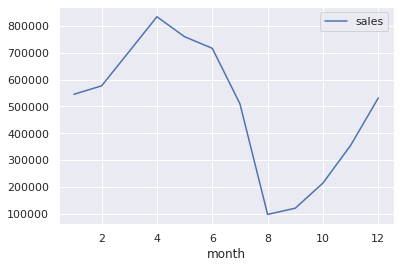

In [205]:
train_data.groupby('month').agg({'sales':'sum'}).plot();

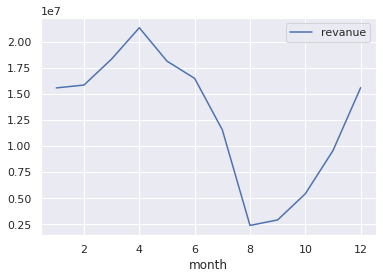

In [200]:
train_data.groupby('month').agg({'revanue':'sum'}).plot();

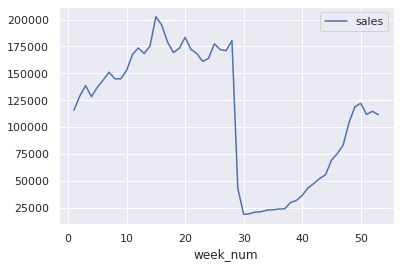

In [206]:
train_data.groupby('week_num').agg({'sales':'sum'}).plot();

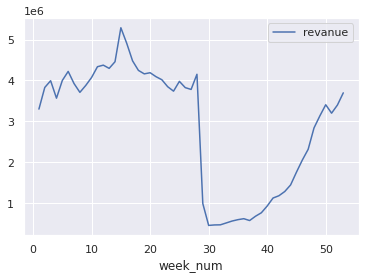

In [202]:
train_data.groupby('week_num').agg({'revanue':'sum'}).plot();

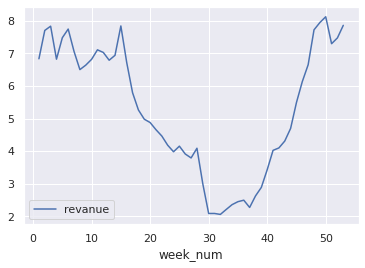

In [207]:
train_data.groupby('week_num').agg({'revanue':'mean'}).plot();

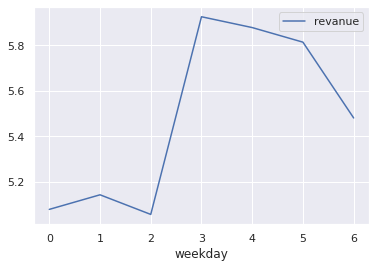

In [208]:
train_data.groupby('weekday').agg({'revanue':'mean'}).plot();

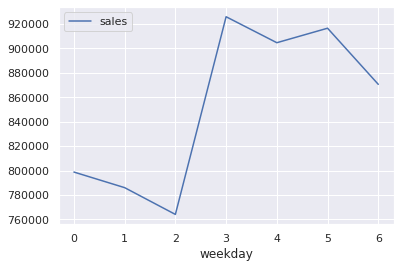

In [210]:
train_data.groupby('weekday').agg({'sales':'sum'}).plot();

In [214]:
train_data.groupby('geoCluster').agg({'sales':'sum'}).sort_values(by='sales')[::-1][:10]

,sales
geoCluster,
2054,166547.750000
2043,155805.953125
2735,144372.843750
2049,133697.453125
2022,111406.937500
2149,105604.242188
1935,105348.507812
2021,102543.117188
2056,97179.359375


In [217]:
train_data.groupby('geoCluster').agg({'revanue':'sum'}).sort_values(by='revanue')[::-1][:10]

,revanue
geoCluster,
2054,4770067.00
2735,4423000.50
2043,4202479.50
2049,3682008.75
1935,3152000.25
2149,3024535.75
2022,2878047.75
2031,2675516.00
2021,2587044.00


### analysis of date blocks

In [222]:
train_data['week_num'].value_counts().sort_values()[:10]

30    222326
31    227813
32    232363
33    237139
34    241971
35    246734
36    251779
37    256565
38    261961
39    267483
Name: week_num, dtype: int64

In [224]:
train_data['date'].max()

Timestamp('2021-07-19 00:00:00')

In [225]:
train_data[train_data['date']==train_data['date'].max()]

,ID,geoCluster,SKU,date,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId,price,lagerUnitQuantity,lagerUnitTypeId,revanue
11,RR27956458,21,32485,2021-07-19,0.0,7,19,0,29,г,170,Банан,1,39.689999,1.0,1,0.0
26,RR27956473,92,32485,2021-07-19,0.0,7,19,0,29,г,170,Банан,1,38.290001,1.0,1,0.0
80,RR27956542,112,32485,2021-07-19,0.0,7,19,0,29,г,170,Банан,1,45.389999,1.0,1,0.0
171,RR27956680,131,32485,2021-07-19,0.0,7,19,0,29,г,170,Банан,1,43.990002,1.0,1,0.0
256,RR27956765,148,32485,2021-07-19,0.0,7,19,0,29,г,170,Банан,1,43.990002,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27956389,RR55912696,3230,802919,2021-07-19,0.0,7,19,0,29,кг,76,Хлеб подовый пшеничный с добавками собств произв,0,80.989998,1.0,2,0.0
27956403,RR55912780,3230,802927,2021-07-19,0.0,7,19,0,29,кг,76,Хлеб подовый пшеничный с добавками собств произв,0,161.990005,1.0,2,0.0
27956420,RR55912815,3230,803415,2021-07-19,0.0,7,19,0,29,кг,76,Печенье руч работы пекарня без добав собств пр...,0,497.089996,1.0,2,0.0
27956426,RR50630856,1677,871159,2021-07-19,0.0,7,19,0,29,г,76,Пицца с мясной начинкой допек,0,113.589996,500.0,1,0.0


In [230]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27956445 entries, 0 to 27956444
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   ID                          object        
 1   geoCluster                  uint16        
 2   SKU                         uint32        
 3   date                        datetime64[ns]
 4   sales                       float32       
 5   month                       uint8         
 6   day                         uint8         
 7   weekday                     uint8         
 8   week_num                    uint8         
 9   lagerUnitType_caption       object        
 10  commodity_group             uint8         
 11  productCategory_caption_RU  object        
 12  cityId                      uint8         
 13  price                       float32       
 14  lagerUnitQuantity           float32       
 15  lagerUnitTypeId             uint8         
 16  revanue         

In [231]:
train_data.to_csv('train_data.csv', index=False)